# Contexto
- Conjunto de dados relativos às vendas de derivados de combustível de petróleo e etanol no Brasil (1990-2022);
- Acoluna UNIDADE DE FEDERAÇÃO representa os estados no Brasil;
- A coluna GRANDE REGIÃO representa as regiões no Brasil:
 - Norte;
 - Sul;
 - Centro-Oeste;
 - Sudeste e;
 - Nordeste
- A coluna VENDAS representa o volume vendido em metros cúbicos (m3);
- A coluna PRODUTO pode ter os seguintes valores:
 - etanol hidratado;
 - gasolina C;
 - gasolina de aviação;
 - GLP;
 - óleo combustível;
 - óleo diesel;
 - querosene iluminante e;
 - querosene de aviação.

## Tratamento dos dados

In [169]:
# importa dependencias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# carrega os dados
vendasPetEta = pd.read_csv('vendas-derivados-petroleo-etanol-m3-1990-2022.csv', sep=';')
vendasPetEta.head()

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
0,2007,FEV,REGIÃO SUDESTE,MINAS GERAIS,ETANOL HIDRATADO,"34849,96978"
1,2007,JAN,REGIÃO SUDESTE,ESPÍRITO SANTO,ETANOL HIDRATADO,"4733,742877"
2,2007,MAR,REGIÃO NORDESTE,BAHIA,ETANOL HIDRATADO,"11786,21303"
3,2007,MAI,REGIÃO NORDESTE,BAHIA,ETANOL HIDRATADO,"11795,24273"
4,2007,FEV,REGIÃO NORDESTE,BAHIA,ETANOL HIDRATADO,"9585,085759"


In [3]:
# verifica a consistência dos dados
vendasPetEta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83808 entries, 0 to 83807
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ANO                   83808 non-null  int64 
 1   MÊS                   83808 non-null  object
 2   GRANDE REGIÃO         83808 non-null  object
 3   UNIDADE DA FEDERAÇÃO  83808 non-null  object
 4   PRODUTO               83808 non-null  object
 5   VENDAS                83808 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.8+ MB


In [4]:
# prepara os dados e otimiza uso da memoria
vendasPetEta['GRANDE REGIÃO'] = vendasPetEta['GRANDE REGIÃO'].str.strip().astype('category')
vendasPetEta['UNIDADE DA FEDERAÇÃO'] = vendasPetEta['UNIDADE DA FEDERAÇÃO'].str.strip().astype('category')
vendasPetEta['VENDAS'] = vendasPetEta['VENDAS'].str.replace(',', '.').astype('float')
vendasPetEta['PRODUTO'] = vendasPetEta['PRODUTO'].str.strip().astype('category')

In [5]:
# troca as inicias do mes por numeros inteiros
vendasPetEta['MÊS'] = vendasPetEta['MÊS'].str.replace('JAN', '01')
vendasPetEta['MÊS'] = vendasPetEta['MÊS'].str.replace('FEV', '02')
vendasPetEta['MÊS'] = vendasPetEta['MÊS'].str.replace('MAR', '03')
vendasPetEta['MÊS'] = vendasPetEta['MÊS'].str.replace('ABR', '04')
vendasPetEta['MÊS'] = vendasPetEta['MÊS'].str.replace('MAI', '05')
vendasPetEta['MÊS'] = vendasPetEta['MÊS'].str.replace('JUN', '06')
vendasPetEta['MÊS'] = vendasPetEta['MÊS'].str.replace('JUL', '07')
vendasPetEta['MÊS'] = vendasPetEta['MÊS'].str.replace('AGO', '08')
vendasPetEta['MÊS'] = vendasPetEta['MÊS'].str.replace('SET', '09')
vendasPetEta['MÊS'] = vendasPetEta['MÊS'].str.replace('OUT', '10')
vendasPetEta['MÊS'] = vendasPetEta['MÊS'].str.replace('NOV', '11')
vendasPetEta['MÊS'] = vendasPetEta['MÊS'].str.replace('DEZ', '12')

In [6]:
# concatena as colunas
vendasPetEta['DATA'] = vendasPetEta['ANO'].astype('str') + "-" + vendasPetEta['MÊS']
# transforma o tipo a datetime
vendasPetEta['DATA'] = pd.to_datetime(vendasPetEta['DATA'], format='%Y-%m')
# apaga colunas
vendasPetEta.drop(['ANO', 'MÊS'], axis=1, inplace=True)
# enxuta valores
vendasPetEta['GRANDE REGIÃO'] = vendasPetEta['GRANDE REGIÃO'].str.replace('REGIÃO', '').str.strip()
vendasPetEta

,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS,DATA
0,SUDESTE,MINAS GERAIS,ETANOL HIDRATADO,34849.969780,2007-02-01
1,SUDESTE,ESPÍRITO SANTO,ETANOL HIDRATADO,4733.742877,2007-01-01
2,NORDESTE,BAHIA,ETANOL HIDRATADO,11786.213030,2007-03-01
3,NORDESTE,BAHIA,ETANOL HIDRATADO,11795.242730,2007-05-01
4,NORDESTE,BAHIA,ETANOL HIDRATADO,9585.085759,2007-02-01
...,...,...,...,...,...
83803,NORDESTE,ALAGOAS,ÓLEO DIESEL,19261.391000,2006-06-01
83804,NORDESTE,ALAGOAS,ÓLEO DIESEL,20223.412000,2006-05-01
83805,NORTE,AMAZONAS,ÓLEO DIESEL,57172.278000,2006-04-01
83806,NORTE,AMAZONAS,ÓLEO DIESEL,63322.163000,2006-03-01


In [7]:
vendasPetEta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83808 entries, 0 to 83807
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   GRANDE REGIÃO         83808 non-null  object        
 1   UNIDADE DA FEDERAÇÃO  83808 non-null  category      
 2   PRODUTO               83808 non-null  category      
 3   VENDAS                83808 non-null  float64       
 4   DATA                  83808 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(1), object(1)
memory usage: 2.1+ MB


## Análise dos dados

### P1 - Qual foi o volume total vendido no brasil?

In [8]:
vendasPetEta['VENDAS'].sum()

3386550020.9863505

- Aproximadamente 3.4 bilhões de metros cúbicos de derivados de combustível de petróleo e etanol foram vendidos

### P2 - Qual a região com maior volume vendido?

In [9]:
vendasPetEta[['GRANDE REGIÃO', 'VENDAS']].groupby(by='GRANDE REGIÃO').sum()

,VENDAS
GRANDE REGIÃO,
CENTRO-OESTE,3.482234e+08
NORDESTE,5.438019e+08
NORTE,2.513606e+08
SUDESTE,1.633607e+09
SUL,6.095574e+08


- A região SUL possui a maior quantidade de volume vendido com aproximadamente 610 milhões de metros cúbicos.

### P3 - Qual o produto com maior volume vendido?

In [13]:
vendasPetEta[['PRODUTO', 'VENDAS']].groupby(by='PRODUTO').sum().sort_values(by='VENDAS', ascending=False)

,VENDAS
PRODUTO,
ÓLEO DIESEL,1.381710e+09
GASOLINA C,8.898557e+08
GLP,3.882240e+08
ETANOL HIDRATADO,3.502190e+08
ÓLEO COMBUSTÍVEL,2.078970e+08
QUEROSENE DE AVIAÇÃO,1.634650e+08
QUEROSENE ILUMINANTE,3.119968e+06
GASOLINA DE AVIAÇÃO,2.059783e+06


- O produto mais vendido seria o ÓLEO DIESEL com quase 1382 milhões de metros cúbicos vendidos.

### P4 - Qual o produto com maior volume vendido no 2007?

In [70]:
filtro = vendasPetEta[vendasPetEta['DATA'].dt.year == 2007]  # filtra por ano
filtro[['PRODUTO', 'VENDAS']].groupby(by='PRODUTO').sum().sort_values(by='VENDAS', ascending=False)

,VENDAS
PRODUTO,
ÓLEO DIESEL,4.155818e+07
GASOLINA C,2.432545e+07
GLP,1.203418e+07
ETANOL HIDRATADO,9.366836e+06
ÓLEO COMBUSTÍVEL,5.525058e+06
QUEROSENE DE AVIAÇÃO,4.890597e+06
GASOLINA DE AVIAÇÃO,5.474375e+04
QUEROSENE ILUMINANTE,3.067140e+04


- O produto mais vendido no 2007 seria o ÓLEO DIESEL com quase 42 milhões de metros cúbicos vendidos.

### P5 - Qual o estado com menor volume vendido entre os anos 2010 e 2015?

In [73]:
filtro = vendasPetEta[(vendasPetEta['DATA'].dt.year >= 2010) & (vendasPetEta['DATA'].dt.year <= 2015)]  # filtra entre 2010 e 2015
filtro[['UNIDADE DA FEDERAÇÃO', 'VENDAS']].groupby(by='UNIDADE DA FEDERAÇÃO').sum().sort_values(by='VENDAS', ascending=True)

,VENDAS
UNIDADE DA FEDERAÇÃO,
RORAIMA,1.497750e+06
ACRE,2.057293e+06
AMAPÁ,3.374819e+06
SERGIPE,5.312385e+06
ALAGOAS,6.172754e+06
PIAUÍ,7.128344e+06
TOCANTINS,7.337414e+06
RONDÔNIA,8.022147e+06
RIO GRANDE DO NORTE,8.658377e+06


- O estado de "RORAIMA" é o estado com menor venda de derivados do petróleo e etanol com quase 1,5 milhões de metros cúbicos.

### P6 - No estado da Bahia, qual o produto(s) com volume vendido entre 4000 a 10000 m3 no ano 2000?

In [88]:
filBahia = vendasPetEta[vendasPetEta['UNIDADE DA FEDERAÇÃO'] == 'BAHIA']  # filtra por estado
filBahiaVol = filBahia[(filBahia['VENDAS'] >= 4000) & (filBahia['VENDAS'] <= 10000)]  # filtra por volume
filBahiaVol[filBahiaVol['DATA'].dt.year == 2000]

,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS,DATA
7690,NORDESTE,BAHIA,ETANOL HIDRATADO,8536.354,2000-03-01
7691,NORDESTE,BAHIA,ETANOL HIDRATADO,9104.801,2000-02-01
7723,NORDESTE,BAHIA,ETANOL HIDRATADO,7062.539,2000-10-01
7724,NORDESTE,BAHIA,ETANOL HIDRATADO,7359.172,2000-09-01
7725,NORDESTE,BAHIA,ETANOL HIDRATADO,8172.684,2000-11-01
7729,NORDESTE,BAHIA,ETANOL HIDRATADO,8058.209,2000-04-01
7730,NORDESTE,BAHIA,ETANOL HIDRATADO,6526.833,2000-06-01
7731,NORDESTE,BAHIA,ETANOL HIDRATADO,8058.728,2000-08-01
7734,NORDESTE,BAHIA,ETANOL HIDRATADO,8012.938,2000-05-01
7762,NORDESTE,BAHIA,ETANOL HIDRATADO,8601.522,2000-07-01


- O produto seria o ETANOL HIDRATADO.

### P7 - Quais foram as vendas por mêses no estado da Amazonas no ano 2012?

In [100]:
amazonas = vendasPetEta[vendasPetEta['UNIDADE DA FEDERAÇÃO'] == 'AMAZONAS']  # filtra por estado
amazonas[(amazonas['DATA'].dt.year == 2012)][['VENDAS', 'DATA']].groupby(by='DATA').sum()  # filtra por mês e totaliza as vendas

,VENDAS
DATA,
2012-01-01,192863.129536
2012-02-01,186838.889849
2012-03-01,216001.478734
2012-04-01,219097.968501
2012-05-01,224159.954991
2012-06-01,232514.924079
2012-07-01,243207.044300
2012-08-01,267749.979141
2012-09-01,244736.657235


### P8 - Crie um gráfico de barras das vendas da região Nordeste por mês no ano 2007?

In [117]:
filtro = vendasPetEta[(vendasPetEta['GRANDE REGIÃO'] == 'NORDESTE') & (vendasPetEta['DATA'].dt.year == 2007)]  # filtra por ano e região
result = filtro[['DATA', 'VENDAS']].groupby(by='DATA').sum()  # soma das vendas por mês
result

,VENDAS
DATA,
2007-01-01,1.221052e+06
2007-02-01,1.062589e+06
2007-03-01,1.208522e+06
2007-04-01,1.109781e+06
2007-05-01,1.190155e+06
2007-06-01,1.175353e+06
2007-07-01,1.207994e+06
2007-08-01,1.272507e+06
2007-09-01,1.202115e+06


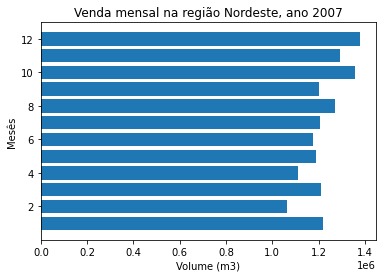

In [141]:
# visualiza os resultados através de um gráfico de barras
plt.barh(result.index.month, result.values.flatten())
plt.ylabel('Mesês')
plt.xlabel('Volume (m3)')
plt.title('Venda mensal na região Nordeste, ano 2007')
plt.show()

- Percebe-se que no mês de dezembro vendeou-se a maior quantidade de derivados. Em contraste, o mês de fevereiro foi a que teve a menor venda.

### P9 - Crie um gráfico comparativo das vendas na região Nordeste, Sudeste e Norte por mês no ano 2010?

In [203]:
# filtra por região e ano
nordeste = vendasPetEta[(vendasPetEta['GRANDE REGIÃO'] == 'NORDESTE') & (vendasPetEta['DATA'].dt.year == 2010)]
sudeste = vendasPetEta[(vendasPetEta['GRANDE REGIÃO'] == 'SUDESTE') & (vendasPetEta['DATA'].dt.year == 2010)]
norte = vendasPetEta[(vendasPetEta['GRANDE REGIÃO'] == 'NORTE') & (vendasPetEta['DATA'].dt.year == 2010)]
# agrupa colunas desejadas
nordeste2010 = nordeste[['VENDAS', 'DATA']].groupby(by='DATA').sum()
sudeste2010 = sudeste[['VENDAS', 'DATA']].groupby(by='DATA').sum()
norte2010 = norte[['VENDAS', 'DATA']].groupby(by='DATA').sum()

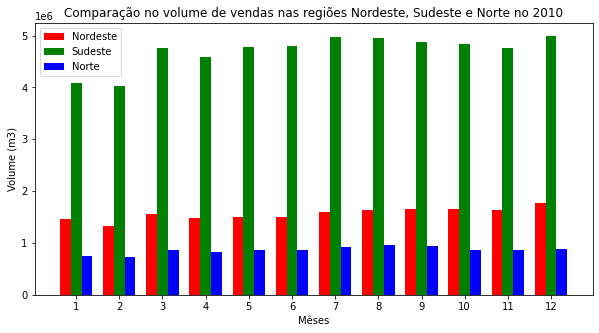

In [186]:
# visualiza os resultados através de um gráfico de barras
barWidth = 0.25
plt.figure(figsize=(10,5))

pos1 = np.arange(len(nordeste2010))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]

plt.bar(pos1, nordeste2010.values.flatten(), width=barWidth, color='r', label='Nordeste')
plt.bar(pos2, sudeste2010.values.flatten(), width=barWidth, color='g', label='Sudeste')
plt.bar(pos3, norte2010.values.flatten(), width=barWidth, color='b', label='Norte')

plt.xlabel('Mêses')
plt.xticks([pos + barWidth for pos in range(len(nordeste2010))], nordeste2010.index.month)
plt.ylabel('Volume (m3)')
plt.title('Comparação no volume de vendas nas regiões Nordeste, Sudeste e Norte no 2010')

plt.legend()
plt.show()

- No gráfico, a região Sudeste possui um volume de vendas muito superior às outras duas regiões em todos os mêses do ano 2010;
- O menor volume de vendas, nesta comparação, seria para a região Norte;
- Nas regiões do Nordeste e Norte, praticamente a vendas em todos os mêses possui poucas variações;
- Em janeiro e fevereio para a região Sudeste existe uma queda nas vendas quando comparado aos demais mêses.

### P10 - Crie um gráfico comparativo das vendas mensais nos estados da região Sudeste no ano 2010?

In [196]:
 # filtra por região e ano e agrupa por colunas desejadas
sudeste2010 = vendasPetEta[(vendasPetEta['GRANDE REGIÃO'] == 'SUDESTE') & (vendasPetEta['DATA'].dt.year == 2010)]
rioJaneiro = sudeste2010[sudeste2010['UNIDADE DA FEDERAÇÃO'] == 'RIO DE JANEIRO'][['VENDAS', 'DATA']].groupby(by='DATA').sum()
saoPaulo = sudeste2010[sudeste2010['UNIDADE DA FEDERAÇÃO'] == 'SÃO PAULO'][['VENDAS', 'DATA']].groupby(by='DATA').sum()
minasGerais =sudeste2010[sudeste2010['UNIDADE DA FEDERAÇÃO'] == 'MINAS GERAIS'][['VENDAS', 'DATA']].groupby(by='DATA').sum()
espirituSanto =sudeste2010[sudeste2010['UNIDADE DA FEDERAÇÃO'] == 'ESPÍRITO SANTO'][['VENDAS', 'DATA']].groupby(by='DATA').sum()

In [202]:
len(sudeste2010)

384

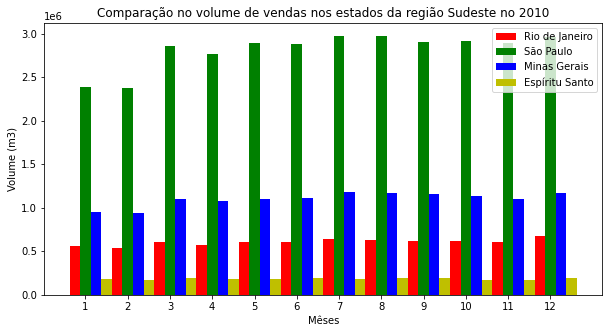

In [207]:
# visualiza os resultados através de um gráfico de barras
barWidth = 0.25
plt.figure(figsize=(10,5))

pos1 = np.arange(len(sudeste2010))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]

plt.bar(pos1, rioJaneiro.values.flatten(), width=barWidth, color='r', label='Rio de Janeiro')
plt.bar(pos2, saoPaulo.values.flatten(), width=barWidth, color='g', label='São Paulo')
plt.bar(pos3, minasGerais.values.flatten(), width=barWidth, color='b', label='Minas Gerais')
plt.bar(pos4, espirituSanto.values.flatten(), width=barWidth, color='y', label='Espíritu Santo')

plt.xlabel('Mêses')
plt.xticks([pos + barWidth for pos in range(12)], sudeste2010.index.month)
plt.ylabel('Volume (m3)')
plt.title('Comparação no volume de vendas nos estados da região Sudeste no 2010')

plt.legend()
plt.show()

- Percebe-se que o estado de São Paulo possui uma grande diferença no volume de vendas quando comparado aos outros estados;
- o estado com menor volume de vendas é o estado do Espíritu Santo;
- Nos mêses de janeiro e fevereiro, os estado de São Paulo experimenta uma queda diferenciada no volume de vendas.

### Data sources
https://dados.gov.br/dataset/vendas-de-derivados-de-petroleo-e-biocombustiveis/resource/c26f99d7-c76d-44f6-a15c-24621415cad6

https://dados.gov.br/dataset/vendas-de-derivados-de-petroleo-e-biocombustiveis/resource/c3d6e0b4-f86e-48f8-9325-6cc0d434b33f